In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [8]:
# Define directories
train_dir = 'dataset/Kather_texture_2016_image_tiles_5000/train'
val_dir = 'dataset/Kather_texture_2016_image_tiles_5000/validation'
test_dir = 'dataset/Kather_texture_2016_image_tiles_5000/test'

In [9]:
# Define image parameters
image_size = (150, 150)
batch_size = 32
num_classes = 8

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    shuffle=True
)

Found 4000 images belonging to 8 classes.


In [13]:
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    shuffle=False
)

Found 496 images belonging to 8 classes.


In [14]:
# Evaluate the model
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    class_mode='categorical',  # For multiclass classification
    shuffle=False
)

Found 504 images belonging to 8 classes.


In [4]:
from utils.metrics import performance
from utils.models import alexnet, googlenet

In [16]:
alexnet = alexnet((150, 150, 3), 8)

In [ ]:
alexnet.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
alexnet.fit(train_generator, validation_data=validation_generator, epochs=50)

Epoch 1/50


/Users/karthik/Desktop/UROP/Code/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 494ms/step - accuracy: 0.1458 - loss: 2.0865 - val_accuracy: 0.3105 - val_loss: 1.6937
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 70s 553ms/step - accuracy: 0.3366 - loss: 1.5408 - val_accuracy: 0.4294 - val_loss: 1.2856
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 69s 547ms/step - accuracy: 0.3193 - loss: 1.6011 - val_accuracy: 0.4415 - val_loss: 1.2421
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 69s 543ms/step - accuracy: 0.4329 - loss: 1.3125 - val_accuracy: 0.4980 - val_loss: 1.0968
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 70s 553ms/step - accuracy: 0.4058 - loss: 1.3144 - val_accuracy: 0.4960 - val_loss: 1.1700
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 72s 574ms/step - accuracy: 0.4555 - loss: 1.2222 - val_accuracy: 0.5504 - val_loss: 1.0374
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 87s 692ms/step - accuracy: 0.5019 - loss: 1.1551 - val_accuracy: 0.5262 - val_loss: 1.0552
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 97s 772ms/step - accuracy: 0.5034 - loss: 1.1295 - val

In [19]:
alexnet.save('Alexnet_1.keras')

Google Net

In [ ]:
googlenetModel = googlenet((150, 150, 3), 8)

In [108]:
googlenetModel.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [109]:
googlenetModel.fit(train_generator, validation_data=validation_generator, epochs=50)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 105s 811ms/step - accuracy: 0.2665 - loss: 1.8122 - val_accuracy: 0.6028 - val_loss: 0.8776
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 100s 790ms/step - accuracy: 0.5770 - loss: 0.9721 - val_accuracy: 0.6331 - val_loss: 0.7553
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 98s 777ms/step - accuracy: 0.6999 - loss: 0.7254 - val_accuracy: 0.7198 - val_loss: 0.7012
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 102s 808ms/step - accuracy: 0.7705 - loss: 0.6337 - val_accuracy: 0.8165 - val_loss: 0.5343
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 105s 833ms/step - accuracy: 0.7819 - loss: 0.5769 - val_accuracy: 0.8065 - val_loss: 0.5097
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 103s 820ms/step - accuracy: 0.7839 - loss: 0.5684 - val_accuracy: 0.8266 - val_loss: 0.5344
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 107s 847ms/step - accuracy: 0.8177 - loss: 0.5012 - val_accuracy: 0.8004 - val_loss: 0.5328
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 119s 942ms/step - accuracy: 0.8231 - 

In [110]:
googlenetModel.save('GoogleNet_1.keras')

504/504 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step
Accuracy: 0.8551587301587301


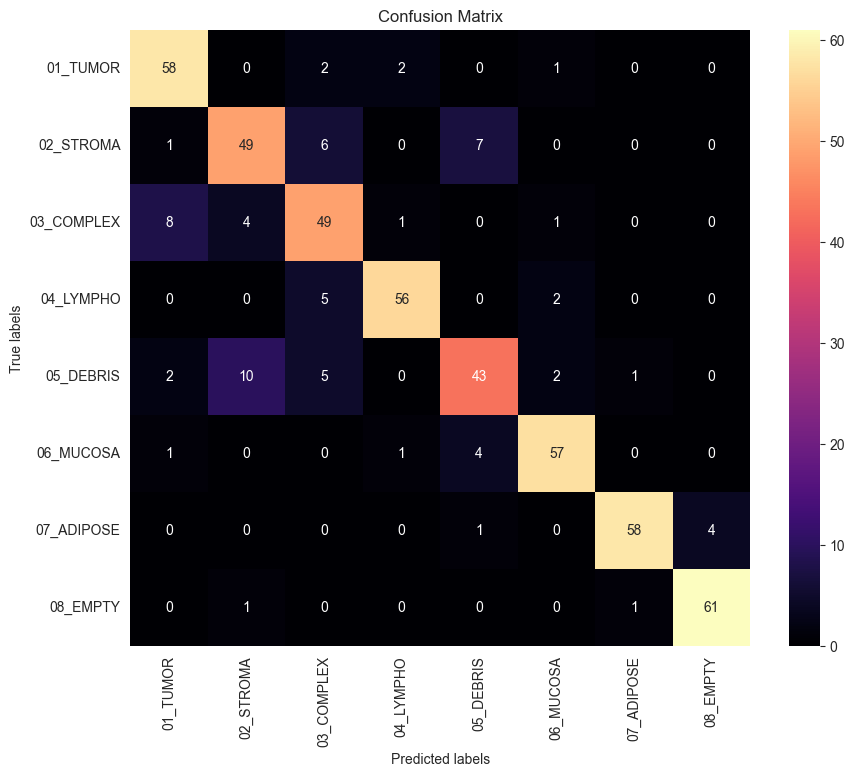

In [111]:
performance(googlenetModel, test_generator)

In [1]:
from models import ResNet

In [2]:
resnetModel = ResNet((150,150,3), 8)

In [14]:
resnetModel.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
resnetModel.fit(train_generator, validation_data=validation_generator, epochs=50)

Epoch 1/50


/Users/karthik/Desktop/UROP/Code/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.3047 - loss: 5.8209 - val_accuracy: 0.3669 - val_loss: 3.1842
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.5991 - loss: 1.0195 - val_accuracy: 0.1371 - val_loss: 3.3321
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 568s 5s/step - accuracy: 0.6743 - loss: 0.8623 - val_accuracy: 0.2661 - val_loss: 2.7843
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.7198 - loss: 0.7107 - val_accuracy: 0.6210 - val_loss: 1.2366
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 369s 3s/step - accuracy: 0.7014 - loss: 0.7630 - val_accuracy: 0.3831 - val_loss: 2.6055
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 393s 3s/step - accuracy: 0.7267 - loss: 0.7095 - val_accuracy: 0.5746 - val_loss: 1.0786
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 416s 3s/step - accuracy: 0.7608 - loss: 0.6272 - val_accuracy: 0.3266 - val_loss: 4.9735
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 436s 3s/step - accuracy: 0.7723 - loss: 0.5933 - val_accuracy: 0.429

In [17]:
resnetModel.save('models/ResNet.keras')

In [2]:
import tensorflow as tf

In [3]:
resnet = tf.keras.models.load_model('models/ResNet.keras')

/Users/karthik/Desktop/UROP/Code/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


504/504 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step
Accuracy: 0.8234126984126984


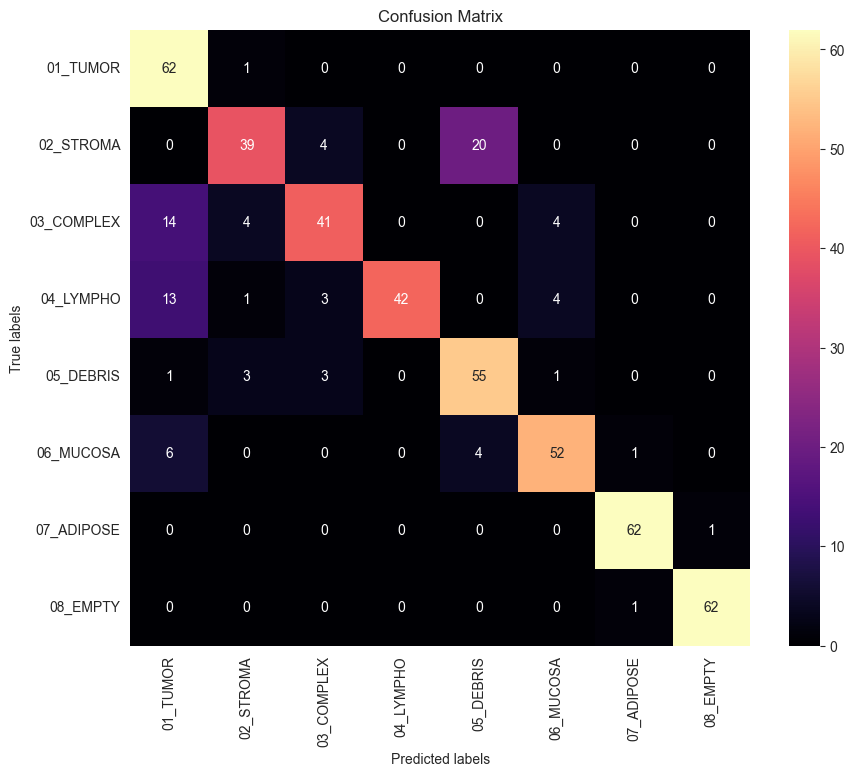

In [15]:
performance(resnet, test_generator)